In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle as pkl

In [14]:
megamask = pkl.load(open("../analysis/pixel_em/10workers_rand0/obj31/mega_mask.pkl"))

In [15]:
def plot_img(mask):
    plt.imshow(mask)
    plt.colorbar()

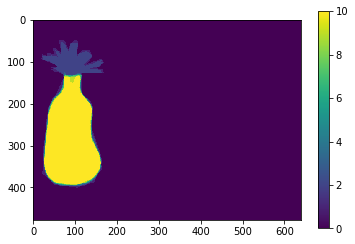

In [16]:
plot_img(megamask)

In [18]:

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
img = megamask
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

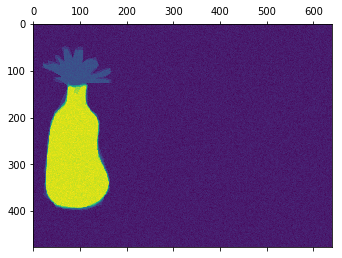

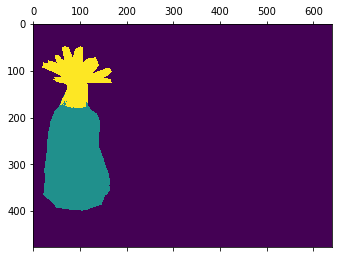

In [19]:

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)